#  Yiming Liu

# Problem_1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import math
sys.path.append('/Users/yimingliu/Downloads/HW3-code/')
import mltools as ml
iris = np.genfromtxt("/Users/yimingliu/Downloads/HW3-code/data/iris.txt",delimiter=None)
%matplotlib inline

In [2]:
# (a)
X, Y = iris[:,0:2], iris[:,-1]
X,Y  = ml.shuffleData(X,Y)
X,_  = ml.transforms.rescale(X)
XA, YA = X[Y<2,:], Y[Y<2] ## get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] ## get class 1 vs 2

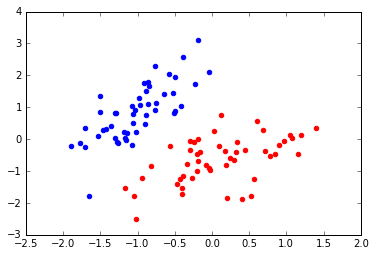

In [190]:
## Scatter plot of data points in 0 vs 1 case
colors=['b','r']
for c in np.unique(YA):
    plt.scatter(XA[YA==c,0],XA[YA==c,1],color=colors[int(c)])

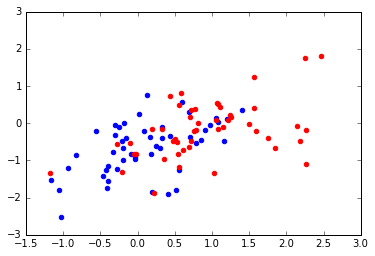

In [191]:
# Scatetr plot of data points in 1 vs 2 case
colors=['b','r']
for c in np.unique(YB):
    plt.scatter(XB[YB==c,0],XB[YB==c,1],color=colors[int(c)-1])

From above plots, we can see different colored points in the first plot have no overlapping, showing great linear separability, while different colored points in second plot have significant overlap. Thus, dataset with XA and YA is linearly separable, but dataset with XB and YB is not linearly separable.

In [4]:
#(b)
import importlib
import mltools as ml
import mltools.logistic2 as lc2
importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YA)
wts = [0.5,1,-0.25]  
learner.theta=wts   

In [193]:
## plotBoundary function

def plotBoundary(self,X,Y):
    colors = ['b', 'r','g']
    for c in np.unique(Y):
        plt.scatter(X[Y == c, 0], X[Y == c, 1], color=colors[int(c)])
    X1=np.reshape(X[:,0],(len(X[:,0]),1))
    plt.plot(X1,(X1*(self.theta[1])+self.theta[0])/-self.theta[2],color='y')

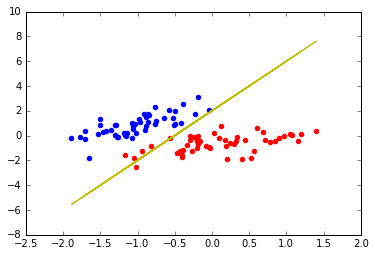

In [194]:
learner.plotBoundary(XA,YA)

In [195]:
importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YB)
wts = [0.5,1,-0.25]  
learner.theta=wts   

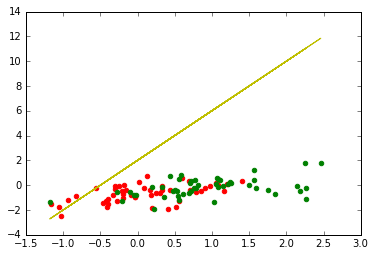

In [196]:
learner.plotBoundary(XB,YB)

In [199]:
#(c)

importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YA)
wts = [0.5,1,-0.25]  
learner.theta=wts   

In [200]:
## predict function
def predict(self, X):
    n = len(X)
    z=[]
    Yhat=[]
    for i in range(0,n):
        ## compute linear response z[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] for each i
        z.append(self.theta[0]+self.theta[1]*X[i,0]+self.theta[2]*X[i,1])
    for i in range(0,n):
        ## if z[i] > 0, predict class 1
        ## else predict class 0
        if z[i]>0:
            Yhat.append(1)
        else:
            Yhat.append(0)
    Yhat=np.array(Yhat)
    return Yhat

In [201]:
Yhat_1=learner.predict(XA)

In [202]:
## Error rate for the first data set
(len(YA)-sum(Yhat_1==YA))/len(YA)

0.050505050505050504

In [203]:
importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YB)
wts = [0.5,1,-0.25]  
learner.theta=wts    

In [204]:
## convert YB from 1 vs 2 to 0 vs 1
YB_new=[]
for i in range(0,len(YB)):
    if YB[i]==1:
        YB_new.append(0)
    else:
        YB_new.append(1)

In [205]:
Yhat_2=learner.predict(XB)

In [206]:
## Error rate for the second data set
(len(YB)-sum(Yhat_2==YB))/len(YB)

0.54545454545454541

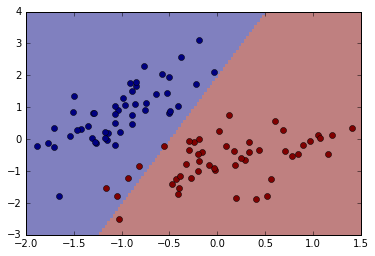

In [207]:
#(d)
importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YA)
wts = [0.5,1,-0.25]  
learner.theta=wts

ml.plotClassify2D(learner, XA, YA )

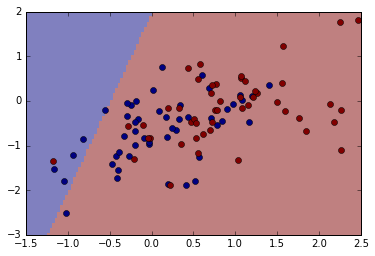

In [208]:
importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YB)
wts = [0.5,1,-0.25]  
learner.theta=wts    


ml.plotClassify2D(learner, XB, YB )

Above two plots clearly match the previous plots based on manually constructed learner. Thus above predict code matches boundary plots.

In [211]:
# (f) Completed train function 

def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopIter=5000, plot=None):
    ## First do some bookkeeping and setup:
    self.theta,X,Y = twod(self.theta), arr(X), arr(Y)   ## convert to numpy arrays
    M,N = X.shape
    if Y.shape[0] != M:
        raise ValueError("Y must have the same number of data (rows) as X")
    self.classes = np.unique(Y)
    if len(self.classes) != 2:
        raise ValueError("Y should have exactly two classes (binary problem expected)")
    if self.theta.shape[1] != N+1:  ##if self.theta is empty, initialize it!
        self.theta = np.random.randn(1,N+1)
    ## Some useful modifications of the data matrices:
    X1  = np.hstack((np.ones((M,1)),X)) ## make data array with constant feature
    Y01 = toIndex(Y, self.classes)  ## convert Y to canonical "0 vs 1" classes

    it   = 0
    done = False
    Jsur = []
    J01  = []
    while not done:
        step = (2.0 * initStep) / (2.0 + it)   ## common 1/iter step size change

        for i in range(M):  ## for each data point i:
            z= np.dot(X1[i,:],np.transpose(self.theta))## compute zi = linear response of X[i,:]
            s= 1/(1+math.exp(-z))## compute soft response si = logistic( zi )
            if s>0.5:
                y=1
            else:
                y=0
            ## compute prediction yi
            gradi=(s-Y01[i])*X1[i,:]
            ## compute gradient of logistic loss wrt data point i:
                
            ## Take a step down the gradient
            self.theta = self.theta - step * gradi
        Z = np.dot(X1,np.transpose(self.theta))
        S = 1/(1+np.exp(-Z))
        Y_predict=[]
        for m in range(M):
            if S[m,:]>0.5:
                Y_predict.append(1)
            else:
                Y_predict.append(0)
        Y_predict=np.array(Y_predict)
        ## compute error rate
        error= (M-sum(Y_predict==Y01))/M
        J01.append(error)
        ## compute surrogate loss (logistic negative log-likelihood)/M
        surrogate= -(np.dot(Y01,np.log(S))+np.dot((1-Y01),np.log(1-S)))/M
        Jsur.append( surrogate ) 
        it += 1
        done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
    Jsur=np.array(Jsur)
    J01 = np.array(J01)
    return Jsur,J01,self.theta
        

In [212]:
## Modified predict function for above logistic classifier
def predict(self, X):
    """ Return the predictied class of each data point in X"""
    n = len(X)
    z=[]
    Yhat=[]
    for i in range(0,n):
        ## compute linear response
        z.append(self.theta[0]+self.theta[1]*X[i,0]+self.theta[2]*X[i,1])
    z=np.array(z)
    sigmoid=1/(1+np.exp(-z))
    ## Make prediction
    for i in range(0,n):
        if sigmoid[i]>0.5:
            Yhat.append(1)
        else:
            Yhat.append(0)
    Yhat=np.array(Yhat)
    return Yhat

In [36]:
# (g)
importlib.reload(lc2)
learner=lc2.logisticClassify2()

In [37]:
## Run above logistic classifier on data set (XA,YA)
Surrogate,Error,Theta=learner.train(XA, YA, initStep=1.0, 
                                    stopTol=1e-4, stopIter=10000, plot=None)

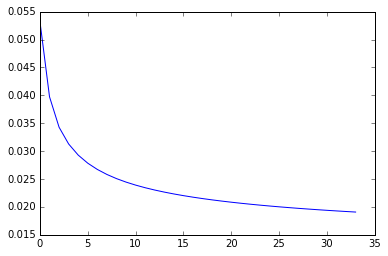

In [38]:
plt.plot(Surrogate) ## Plot of surrogate loss vs number of iteration

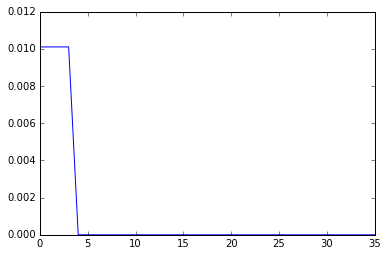

In [290]:
plt.plot(Error) ## error rate vs number of iteration

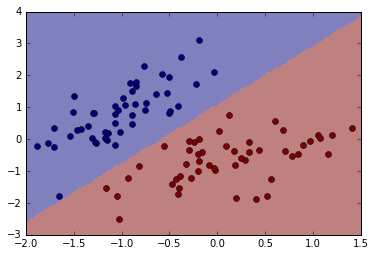

In [291]:
importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YA)
wts = [Theta[:,0],Theta[:,1],Theta[:,2]]  
learner.theta=wts   
ml.plotClassify2D(learner, XA, YA ) ## plot of final converged classifier with the data(XA,YA)

In [46]:
## Run above logistic classifier on data set (XB,YB)
importlib.reload(lc2)
learner=lc2.logisticClassify2()
Surrogate,Error,Theta=learner.train(XB, YB, initStep=1.0, 
                                    stopTol=1e-5, stopIter=10000, plot=None)

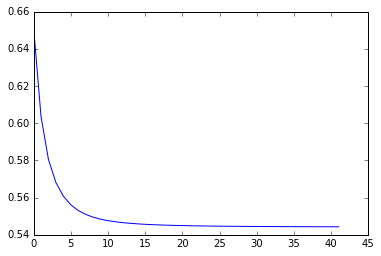

In [47]:
plt.plot(Surrogate) ## Plot of surrogate loss vs number of iteration

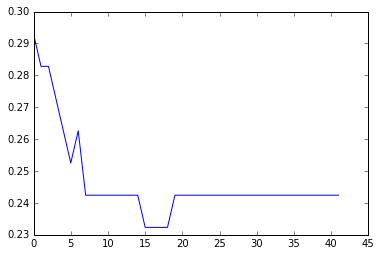

In [48]:
plt.plot(Error) ## error rate vs number of iteration

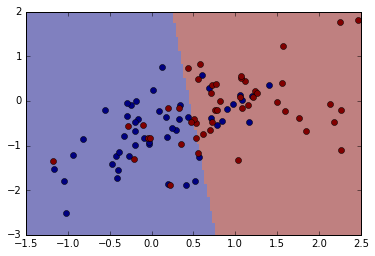

In [49]:
importlib.reload(lc2)
learner=lc2.logisticClassify2()
learner.classes = np.unique(YB)
wts = [Theta[:,0],Theta[:,1],Theta[:,2]]  
learner.theta=wts   
ml.plotClassify2D(learner, XB, YB ) ## plot of final converged classifier with the data(XB,YB)